# A study of the changes in Industry proportion in Singapore, 2006-2017

**Done by: Jamie Yeo Jin Yih, Poh Sze Hui**

This report aims to study the employment changes in Singapore, from different industries (i.e. Construction, Manufacturing, Services and others). We will be narrowing down the nature of the industries to provide more insightful details. This information will be helpful for government officials to look into which industries are growing in terms of size and thus allocate appropriate funding for them. The amount of funds can be used for training purposes when there are more people joining those industries.
 
We have decided to only look into the recent 8 years, from 2008-2016, as we felt that only the more recent data serve useful to project into future trajectories.

In [129]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

We will first look into the different categories of industries in Singapore, and how they are proportioned throughout the years in terms of Employment.

In [141]:
labour_force = pd.read_csv('Breakdown of labour force.csv')
labour_force.head()

,Year,Sector,Proportion of the Industry
0,2008,Manufacturing,19.9
1,2008,Contruction,12.2
2,2008,Services,67.3
3,2008,Others,0.7
4,2009,Manufacturing,17.4


As you can see from a preview of the first 5 rows, it is difficult to notice any trends given the method of data presentation in the dataframe above.

Hence, we have decided to chart them against **stacked bar charts**.

In [131]:
# Create the term_grade_loans_pivot where the index is grade and the columns are the different terms
labour_force_pivot = pd.pivot_table(labour_force, index=['Year'], columns=['Sector'],
                                       values='Proportion of the Industry', aggfunc=np.sum)
# Then reset the index and set the columns to be 3 columns: 'grade', '36 months', '60 months'
labour_force_pivot = labour_force_pivot.reset_index()
labour_force_pivot.columns = ['Year', 'Construction', 'Manufacturing', 'Others', 'Services']
labour_force_pivot

,Year,Construction,Manufacturing,Others,Services
0,2008,12.2,19.9,0.7,67.3
1,2009,12.6,17.4,0.7,69.2
2,2010,12.3,16.7,0.7,70.3
3,2011,12.4,16.2,0.7,70.6
4,2012,13.1,15.9,0.7,70.2
5,2013,13.7,15.5,0.8,70.1
6,2014,13.6,14.8,0.8,70.8
7,2015,13.7,14.1,0.8,71.4
8,2016,13.3,13.6,0.8,72.3


In [132]:
labour_force_pivot_year = labour_force_pivot.set_index('Year')
labour_force_pivot_year.columns = pd.Index(['Construction', 'Manufacturing', 'Others', 'Services'])
labour_force_pivot_year.head()

,Construction,Manufacturing,Others,Services
Year,,,,
2008,12.2,19.9,0.7,67.3
2009,12.6,17.4,0.7,69.2
2010,12.3,16.7,0.7,70.3
2011,12.4,16.2,0.7,70.6
2012,13.1,15.9,0.7,70.2


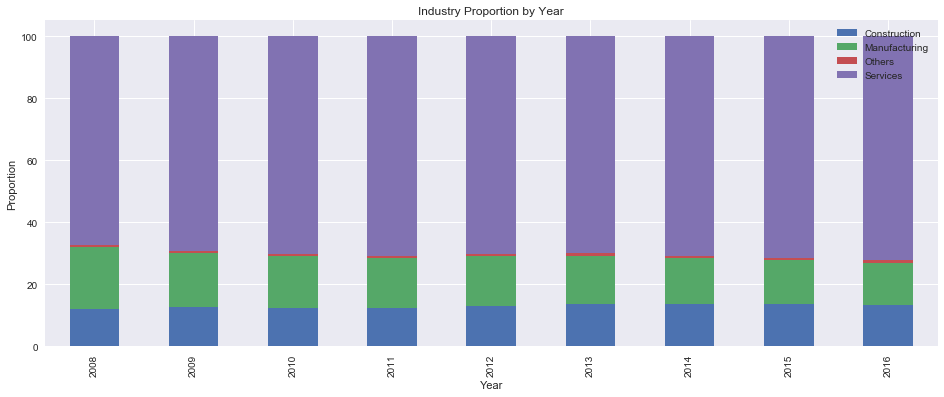

In [133]:
# Plot the stacked bar chart here
fig, ax1 = plt.subplots()
labour_force_pivot_year.plot(kind='bar', stacked=True, 
                                  figsize=(16,6), title="Industry Proportion by Year",
                                   ax=ax1)
ax1.set_ylabel("Proportion")
plt.show()

We have successfully plotted the data against stacked bar charts. This is useful in determining the proportion of Singapore's employment dedicated to each large industry. 

However, the stacked bar charts does not give a clear depiction of the trend observed for each industry over the years. Hence, we have decided to plot a line graph to chart such trends.

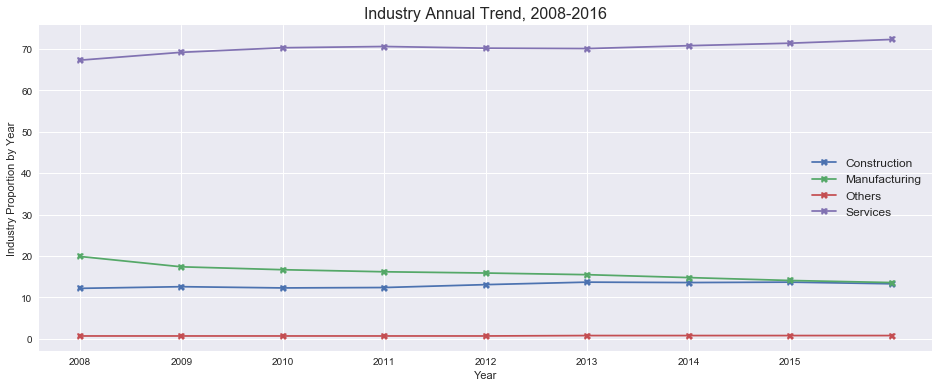

In [144]:
# Plot the line graph where the x-axis is the year and the y-axis is the no. of tourists, in millions
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

labour_force_pivot.plot(kind='line', x='Year', y='Construction', marker="X", title="Construction", ax=ax1)
labour_force_pivot.plot(kind='line', x='Year', y='Manufacturing', marker="X",  title="Manufacturing", ax=ax1)
labour_force_pivot.plot(kind='line', x='Year', y='Others', marker="X", title="Others", ax=ax1)
labour_force_pivot.plot(kind='line', x='Year', y='Services', marker="X",title="Services", ax=ax1)

plt.xticks(np.arange(2008,2016))
plt.xlabel("Year")

plt.ylabel("Industry Proportion by Year")
plt.title("Industry Annual Trend, 2008-2016", fontsize=16)

ax1.legend(["Construction", "Manufacturing", "Others", "Services"], fontsize=12)

We noticed that there is a gentle noticeable increase in employment within the Service sector, and a decrease in employment within the Manufacturing sector.

However, those industries are an umbrella to many sub-sectors within. Hence, we want to look further into which sector within each industry that is causing the noticeable changes. 

**We have decided to evaluate it based on which sector has the highest net percentage change by taking recruitment % - retirement %**

In [135]:
highest_industry_annual = []
for i in range(2008,2017):
    counter = 0
    x = labour_force[(labour_force['Year'].isin([i]))]
    counter = max(x['Proportion of the Industry'])
    y = x[x['Proportion of the Industry'].isin([counter])]
    highest_industry_annual.append([i,list(y['Sector'])])
labour_force_df = pd.DataFrame(highest_industry_annual, columns = ['year', 'Highest Industry'])
labour_force_df

,year,Highest Industry
0,2008,[Services]
1,2009,[Services]
2,2010,[Services]
3,2011,[Services]
4,2012,[Services]
5,2013,[Services]
6,2014,[Services]
7,2015,[Services]
8,2016,[Services]


In [136]:
industry = pd.read_csv('average_monthly_recruitment_resignation.csv')
industry.head()

,year,industry1,industry2,industry3,recruitment_rate,resignation_rate
0,2006,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",3.0,2.5
1,2006,manufacturing,"paper,rubber,plastic products and printing","paper,rubber,plastic products and printing",2.3,2.0
2,2006,manufacturing,"petroleum, chemical and pharmaceutical products","petroleum, chemical and pharmaceutical products",1.5,1.0
3,2006,manufacturing,"fabricated metal products, machinery and equip...","fabricated metal products, machinery and equip...",2.7,1.7
4,2006,manufacturing,"electronic, computer and optical products","electronic, computer and optical products",2.2,1.4


In [137]:
industry1 = industry.copy()
industry1['% change'] = industry1['recruitment_rate'] - industry1['resignation_rate']
industry1.head()

,year,industry1,industry2,industry3,recruitment_rate,resignation_rate,% change
0,2006,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",3.0,2.5,0.5
1,2006,manufacturing,"paper,rubber,plastic products and printing","paper,rubber,plastic products and printing",2.3,2.0,0.3
2,2006,manufacturing,"petroleum, chemical and pharmaceutical products","petroleum, chemical and pharmaceutical products",1.5,1.0,0.5
3,2006,manufacturing,"fabricated metal products, machinery and equip...","fabricated metal products, machinery and equip...",2.7,1.7,1.0
4,2006,manufacturing,"electronic, computer and optical products","electronic, computer and optical products",2.2,1.4,0.8


In [149]:
services_highest_industry3_annual = []
for i in range(2008,2017):
    counter = 0
    x = industry1[(industry1['year'].isin([i])) & (industry1['industry1'].isin(['services']))]
    counter = max(x['% change'])
    y = x[x['% change'].isin([counter])]
    services_highest_industry3_annual.append([i,list(y['industry3']), list(y['% change'])])
services_highest_industry3_annual = pd.DataFrame(services_highest_industry3_annual, columns = ['year', 'Highest Increasing Service Industry3', '% change'])
services_highest_industry3_annual

,year,Highest Increasing Service Industry3,% change
0,2008,[architectural and engineering services],[1.7000000000000002]
1,2009,"[arts, entertainment and recreation]",[2.2]
2,2010,"[arts, entertainment and recreation]",[3.9000000000000004]
3,2011,[insurance services],[1.3]
4,2012,[architectural and engineering services],[1.8]
5,2013,[other adminstrative and support services],[1.1999999999999997]
6,2014,[other adminstrative and support services],[1.9]
7,2015,[other adminstrative and support services],[1.9]
8,2016,[other adminstrative and support services],[1.6000000000000005]


From the dataframe above, we can see a clear winner: "other administrative and support services" could be the main reason for recent increase in employment within the Service sector.

Now, although Manufacturing is shown to be decreasing in net employment, we believe this should not shadow any sub-sectors within Manufacturing industry that could be growing.

Hence, we decided to apply the same analysis as we did for Services to Manufacturing.

In [150]:
manufacturing_highest_industry3_annual = []
for i in range(2008,2017):
    counter = 0
    x = industry1[(industry1['year'].isin([i])) & (industry1['industry1'].isin(['manufacturing']))]
    counter = max(x['% change'])
    y = x[x['% change'].isin([counter])]
    manufacturing_highest_industry3_annual.append([i,list(y['industry3']), list(y['% change'])])
manufacturing_highest_industry3_annual = pd.DataFrame(manufacturing_highest_industry3_annual, columns = ['Year', 'Highest Increasing Service Sector', '% change'])
manufacturing_highest_industry3_annual

,Year,Highest Increasing Service Sector,% change
0,2008,[other manufacturing industries],[0.7]
1,2009,[other manufacturing industries],[0.6000000000000001]
2,2010,[other manufacturing industries],[0.6999999999999997]
3,2011,"[fabricated metal products, machinery and equi...","[0.5, 0.5]"
4,2012,"[food, beverages and tobacco, petroleum, chemi...","[0.6000000000000001, 0.6000000000000001]"
5,2013,"[petroleum, chemical and pharmaceutical products]",[0.8]
6,2014,"[petroleum, chemical and pharmaceutical products]",[0.6000000000000001]
7,2015,"[food, beverages and tobacco]",[0.6000000000000001]
8,2016,"[petroleum, chemical and pharmaceutical products]",[0.4999999999999999]


From the dataframe above, we can see a 2 winners: "petroleum, chemical and pharmaceutical products", and not too far way "food, beverages and tobacco", which could be hidden sub-sectors that are increasing in net employment in recent years.

    

In [151]:
manufacturing_highest_industry3_annual = []
for i in range(2008,2017):
    counter = 0
    x = industry1[(industry1['year'].isin([i])) & (industry1['industry1'].isin(['manufacturing']))]
    counter = min(x['% change'])
    y = x[x['% change'].isin([counter])]
    manufacturing_highest_industry3_annual.append([i,list(y['industry3']), list(y['% change'])])
manufacturing_highest_industry3_annual = pd.DataFrame(manufacturing_highest_industry3_annual, columns = ['Year', 'Lower Increasing Service Sector', '% change'])
manufacturing_highest_industry3_annual

,Year,Lower Increasing Service Sector,% change
0,2008,"[paper,rubber,plastic products and printing]",[0.0]
1,2009,[transport equipment],[-0.3999999999999999]
2,2010,"[paper,rubber,plastic products and printing]",[0.19999999999999973]
3,2011,"[paper,rubber,plastic products and printing]",[0.0]
4,2012,"[paper,rubber,plastic products and printing, e...","[0.10000000000000009, 0.10000000000000009]"
5,2013,"[paper,rubber,plastic products and printing]",[0.0]
6,2014,"[paper,rubber,plastic products and printing]",[0.0]
7,2015,"[fabricated metal products, machinery and equi...",[-0.20000000000000018]
8,2016,"[fabricated metal products, machinery and equi...","[-0.10000000000000009, -0.10000000000000009]"


Similarly, we decided to do the same analysis for the sub-sector that has the lowest net-employment.

From the dataframe above, we can see a 2 winners: "abricated metal products, machinery and equipment", and not too far way "paper,rubber,plastic products and printing", which could be hidden sub-sectors that are decreasing in net employment in recent years.
    

**Credits**
- average-monthly-recruitment-resignation-rate-by-industry-level-3 (https://data.gov.sg/dataset/average-monthly-recruitment-resignation-rates-by-industry-and-occupational-group-annual?resource_id=243896d0-1974-4fee-a4d8-613641b230ad) Source: Labour Market Survey, Manpower Research & Statistics Department, MOM

- Employment Summary Table (https://stats.mom.gov.sg/Pages/Employment-Summary-Table.aspx) Source: stats.mom.gov.sg